<a href="https://colab.research.google.com/github/NeonRio/SVM_Loan_Status_Prediction/blob/main/SVM_Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

In machine learning, **support vector machines** are **supervised learning** models with associated learning algorithms that analyze data for classification and regression analysis. Developed at AT&T Bell Laboratories by Vladimir Vapnik with colleagues. SVMs are one of the most robust prediction methods, being based on statistical learning frameworks or VC theory proposed by Vapnik (1982, 1995) and Chervonenkis (1974). Given a set of training examples, each marked as belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier. SVM maps training examples to points in space so as to maximise the width of the gap between the two categories. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces. 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Kernel_Machine.svg/1920px-Kernel_Machine.svg.png" width="60%" style="background-color:white;"/>


Reference: <a href="https://en.wikipedia.org/wiki/Support_vector_machine">https://en.wikipedia.org/wiki/Support_vector_machine</a>

Upload your kaggle.json file into /content path.

In [34]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached kaggle-1.5.12-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


Installing Kaggle on colab.

In [35]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached kaggle-1.5.12-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


Putting kaggle.json into right place and changing permissions of it.

In [36]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Download the dataset.

In [37]:
!kaggle datasets download -d ninzaami/loan-predication

  0% 0.00/7.83k [00:00<?, ?B/s]
100% 7.83k/7.83k [00:00<00:00, 4.09MB/s]


In [38]:
!unzip loan-predication.zip
!rm loan-predication.zip
!mv train_u6lujuX_CVtuZ9i\ \(1\).csv dataset.csv

Archive:  loan-predication.zip
  inflating: train_u6lujuX_CVtuZ9i (1).csv  


## Importing the dependencies

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn import svm

## Data loading and preprocessing part

In [40]:
df = pd.read_csv("/content/dataset.csv") # load our dataset as pandas dataframe

### Understanding our data

Let's print first 10 rows to see how our data is stored.

In [41]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Our dataset shape is (614, 13) which means, that we have 614 rows and 13 columns.

In [42]:
df.shape

(614, 13)

Statistical info about our data.

In [43]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Getting rid of missing values

Missing values count in each column

In [44]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gettind rid of (dropping) missing values

In [45]:
df.dropna(inplace=True)

Let's check what have been changed.

In [46]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As you can see there are no NaN values in our dataset now.

### Converting our data to numerical

Let's print Loan_Status column of our data.

In [47]:
df["Loan_Status"].head(10)

1     N
2     Y
3     Y
4     Y
5     Y
6     Y
7     N
8     Y
9     N
10    Y
Name: Loan_Status, dtype: object

As we can see our values are Y and N, but we need numbers to work with machine learning algorithms, so we need to do some encoding here.

In [48]:
df.replace({"Loan_Status":{"N":0,"Y":1}}, inplace=True)

Let's check our data now.

In [49]:
df["Loan_Status"].head(10)

1     0
2     1
3     1
4     1
5     1
6     1
7     0
8     1
9     0
10    1
Name: Loan_Status, dtype: int64

As we can see now we have numerical data cause we replaced N with 0 and Y with 1. We need to do the same with other columns.

In [64]:
df.replace({
    "Married": {"No":0,"Yes":1},
    "Gender": {"Female":0,"Male":1},
    "Self_Employed": {"No":0,"Yes":1},
    "Property_Area": {"Rural":0, "Semiurban":1, "Urban":2},
    "Education": {"Not Graduate":0,"Graduate":1}
    }, inplace=True)

In [66]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


As you can we successfully encoded categorical columns into numbers.

Now let's see which kind of values we have in dependents column.

In [50]:
df["Dependents"].value_counts() 

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

Here we have 3+ value and we need to replace it number to avoid problems. We gonna replace it with 4.

In [52]:
df.replace(to_replace="3+", value=4, inplace=True)

Let's check.

In [53]:
df["Dependents"].value_counts() 

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Now instead of 3+ we have 4.

### Data visualization

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data. Additionally, it provides an excellent way for employees or business owners to present data to non-technical audiences without confusion.

"Education" column visualization.

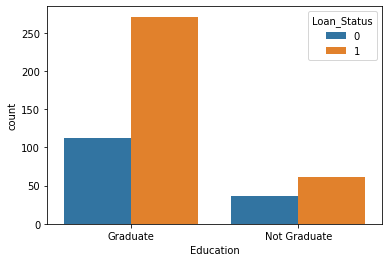

In [55]:
sns.countplot(x="Education", hue="Loan_Status", data=df)

"Married" column visualization.

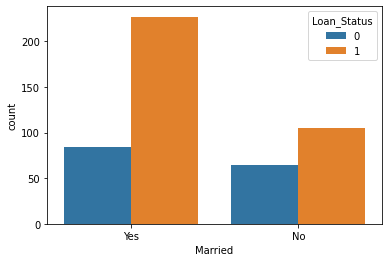

In [58]:
sns.countplot(x="Married", hue="Loan_Status", data=df)

### Separating the data

#### Separating labels and values.

In [67]:
X = df.drop(columns=["Loan_ID","Loan_Status"], axis=1)
Y = df["Loan_Status"]

In [68]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

#### Separating train and test data.

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=74)

`text_size=0.1` means that we divide our data into 2 parts, 10% test data, 90% train data.
<br />
`stratify=Y` makes instances with 0 and 1 labels to split with equal proportions in train and test data.
<br />
If you put `random_state=74` your data and my data will be splited in same way, if you don't want this you can just remove this argument or give another integer value to `random_state`.

In [73]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


As we can see our 480 rows were divided into 2 parts with ratio 0.1, 48 rows and 432 rows.

## Support Vector Machine

In this notebook I'm going to use Support Vector Machine model. You can read about it here - https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

###Model initialization

In [74]:
model = svm.SVC(kernel="linear")

### Model training process

SVC means "Support Vector Classifier". Another type of SVM is SVR - "Support Vector Regression".

For training we need to call fit function of our model.

In [75]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

### Model Evaluation

Let's check the accuracy score of our model on training data.

In [79]:
X_train_pred = model.predict(X_train)
accuracy_training = accuracy_score(X_train_pred, Y_train)

In [80]:
print(accuracy_training)

0.8032407407407407


We have 80% percent accuracy for training data.

Let's check accuracy on test data.

In [81]:
X_test_pred = model.predict(X_test)
accuracy_test = accuracy_score(X_test_pred, Y_test)

In [82]:
print(accuracy_test)

0.75


We have 75% accuracy. If you want higher accuracy you need to use bigger dataset.

It is also useful to get confusion matrix to measure the effectiveness of our model.

In [107]:
cm = confusion_matrix(Y_test, X_test_pred)

In [108]:
print(cm)

[[ 5 10]
 [ 2 31]]


Now we have our confusion matrix, lets graph it.

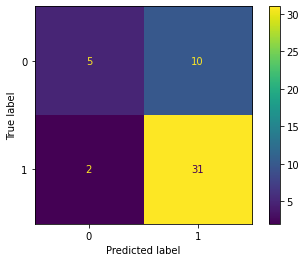

In [112]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

And at last lets print accuracy, precision and f1 score of our model.

In [118]:
precision_test = precision_score(Y_test, X_test_pred)
f1_test = f1_score(Y_test, X_test_pred)

In [120]:
print(
    "\n",
    "Accuracy: ", accuracy_test,
    "\n",
    "Precision: ", precision_test,
    "\n",
    "F1 Score: ", f1_test,
)


 Accuracy:  0.75 
 Precision:  0.7560975609756098 
 F1 Score:  0.8378378378378378
